In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Xáo trộn dữ liệu
X_shuffled, y_shuffled = X.sample(frac=1, random_state=42), y.sample(frac=1, random_state=42)

# Các tỷ lệ train/test
splits = {
    "40_60": (0.4, 0.6),
    "60_40": (0.6, 0.4),
    "80_20": (0.8, 0.2),
    "90_10": (0.9, 0.1)
}

# Lưu các tập con
split_data = {}

for key, (train_size, test_size) in splits.items():
    X_train, X_test, y_train, y_test = train_test_split(
        X_shuffled, y_shuffled, 
        train_size=train_size, test_size=test_size, 
        stratify=y_shuffled, random_state=42
    )
    split_data[key] = {
        "feature_train": X_train,
        "label_train": y_train,
        "feature_test": X_test,
        "label_test": y_test
    }

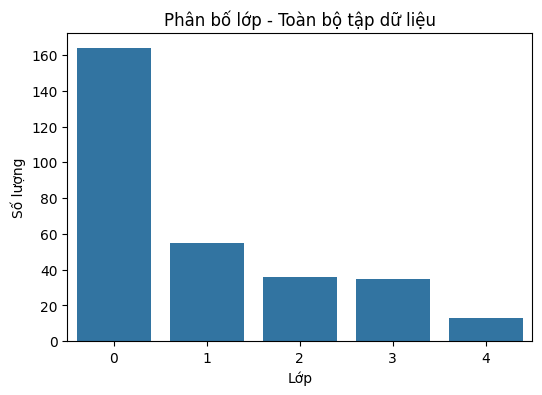

In [5]:
# Vẽ biểu đồ phân bố lớp cho toàn bộ tập dữ liệu
plt.figure(figsize=(6,4))
sns.countplot(x=y.values.ravel())
plt.title("Phân bố lớp - Toàn bộ tập dữ liệu")
plt.xlabel("Lớp")
plt.ylabel("Số lượng")
plt.show()

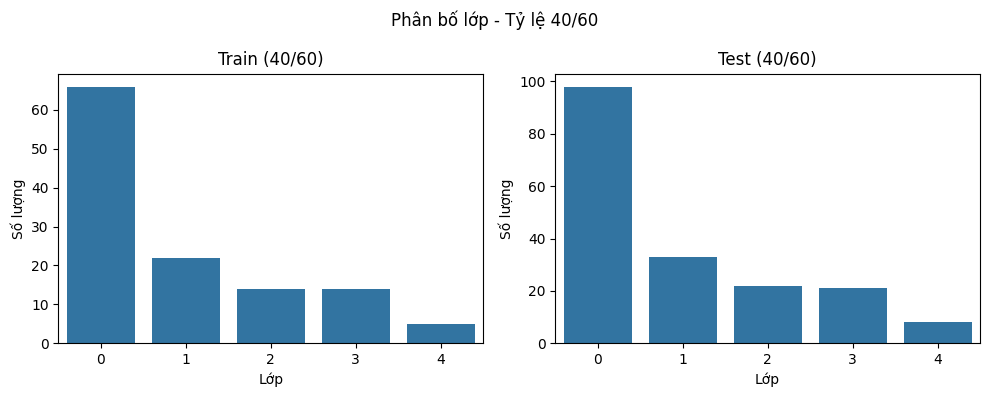

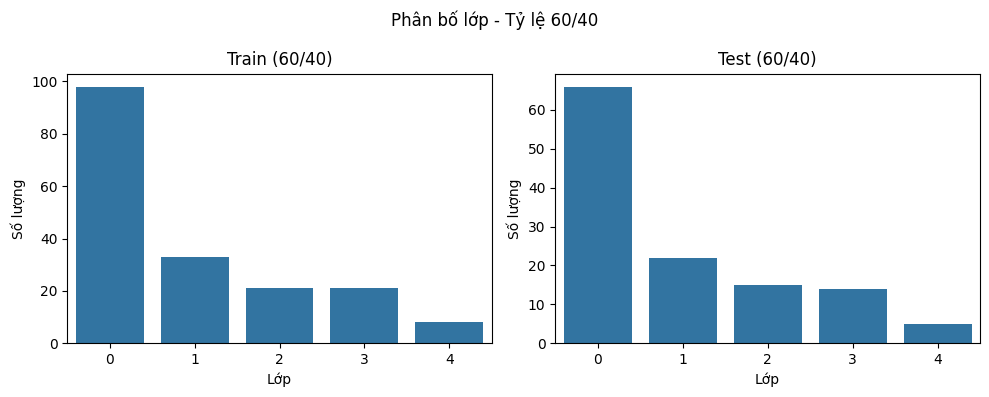

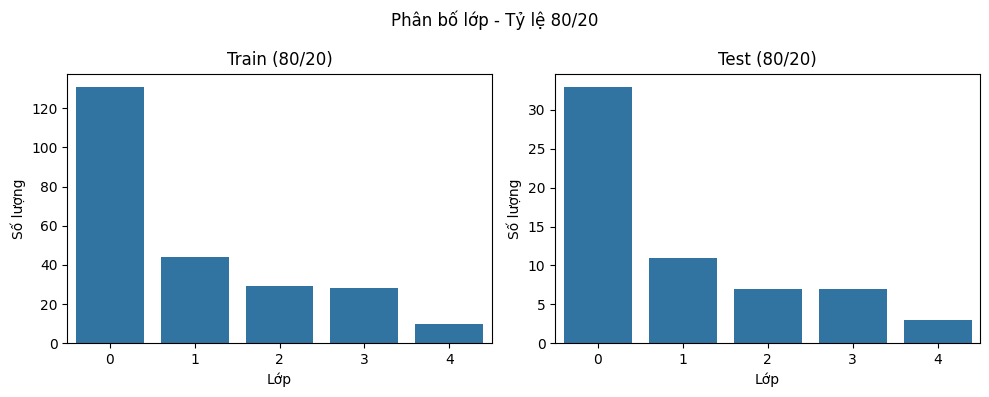

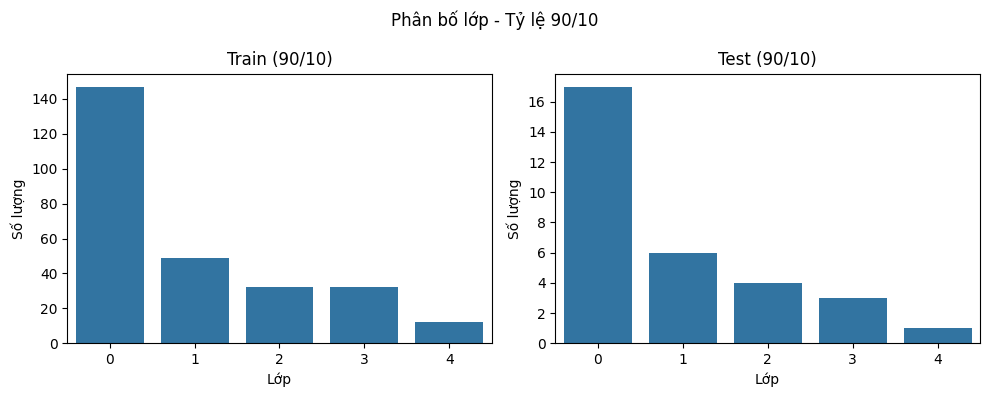

In [6]:
# Vẽ biểu đồ phân bố lớp cho các tập con train/test của từng tỷ lệ
for key, data in split_data.items():
    fig, axes = plt.subplots(1, 2, figsize=(10,4))
    sns.countplot(x=data["label_train"].values.ravel(), ax=axes[0])
    axes[0].set_title(f"Train ({key.replace('_', '/')})")
    axes[0].set_xlabel("Lớp")
    axes[0].set_ylabel("Số lượng")
    sns.countplot(x=data["label_test"].values.ravel(), ax=axes[1])
    axes[1].set_title(f"Test ({key.replace('_', '/')})")
    axes[1].set_xlabel("Lớp")
    axes[1].set_ylabel("Số lượng")
    plt.suptitle(f"Phân bố lớp - Tỷ lệ {key.replace('_', '/')}")
    plt.tight_layout()
    plt.show()

# 2. Xây dựng cây quyết định cho từng tỷ lệ train/test
- Sử dụng DecisionTreeClassifier với criterion='entropy'
- Huấn luyện mô hình trên từng tập train
- Trực quan hóa cây bằng Graphviz

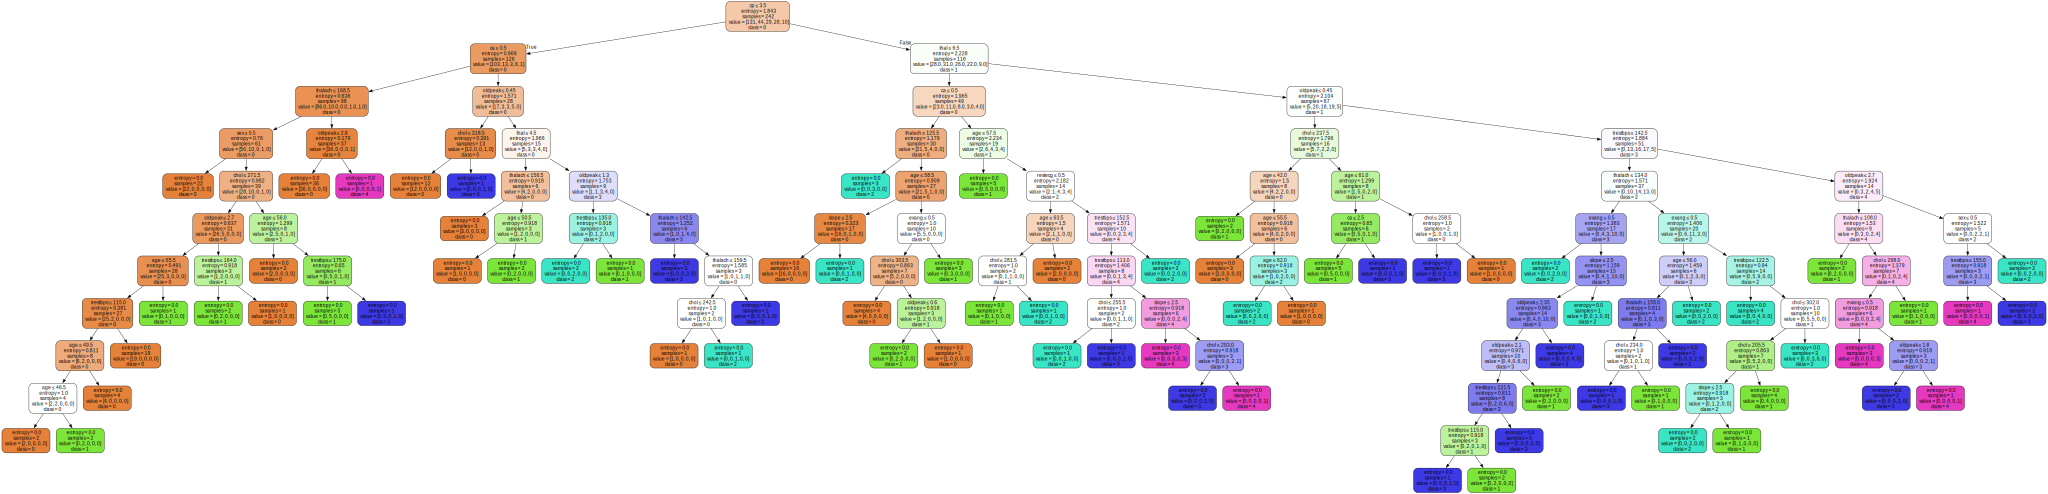

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz

# Lưu mô hình và đồ thị cây cho từng tỷ lệ
dt_models = {}
dot_data_dict = {}

for key, data in split_data.items():
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(data["feature_train"], data["label_train"])
    dt_models[key] = clf
    
    # Xuất cây quyết định ra định dạng DOT
    dot_data = export_graphviz(
        clf, 
        out_file=None, 
        feature_names=data["feature_train"].columns,
        class_names=[str(cls) for cls in np.unique(data["label_train"])],
        filled=True, rounded=True, special_characters=True
    )
    dot_data_dict[key] = dot_data

    # Hiển thị cây quyết định bằng Graphviz (chỉ hiển thị cho tỷ lệ 80/20 làm ví dụ)
    if key == "80_20":
        # Đảm bảo đã cài đặt phần mềm Graphviz và thêm vào PATH để tránh lỗi ExecutableNotFound
        graph = graphviz.Source(dot_data)
        display(graph)

#3

=== Đánh giá mô hình cho tỷ lệ 40/60 ===
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        98
           1       0.29      0.24      0.26        33
           2       0.27      0.27      0.27        22
           3       0.27      0.19      0.22        21
           4       0.12      0.12      0.12         8

    accuracy                           0.54       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.51      0.54      0.52       182

Confusion Matrix:


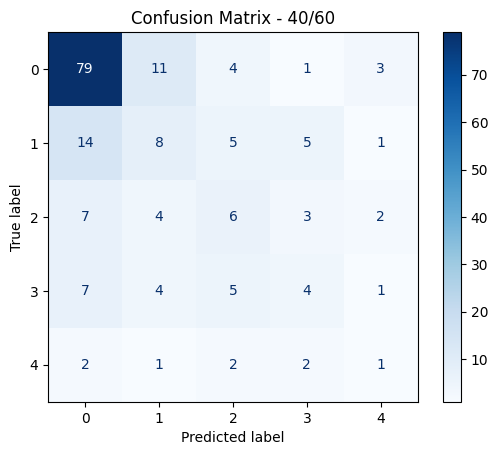

=== Đánh giá mô hình cho tỷ lệ 60/40 ===
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        66
           1       0.06      0.05      0.05        22
           2       0.35      0.40      0.38        15
           3       0.11      0.07      0.09        14
           4       0.14      0.20      0.17         5

    accuracy                           0.49       122
   macro avg       0.28      0.30      0.28       122
weighted avg       0.46      0.49      0.47       122

Confusion Matrix:


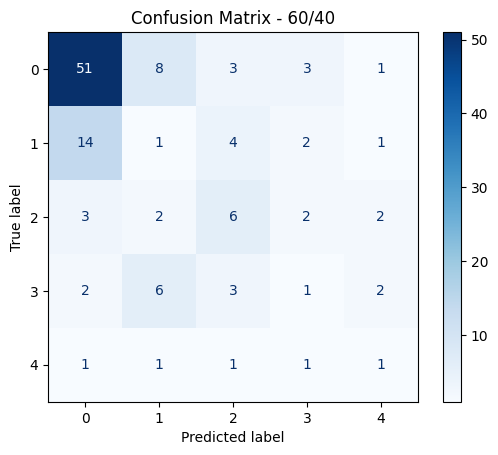

=== Đánh giá mô hình cho tỷ lệ 80/20 ===
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.10      0.09      0.10        11
           2       0.18      0.29      0.22         7
           3       0.14      0.14      0.14         7
           4       0.00      0.00      0.00         3

    accuracy                           0.41        61
   macro avg       0.22      0.23      0.23        61
weighted avg       0.43      0.41      0.42        61

Confusion Matrix:


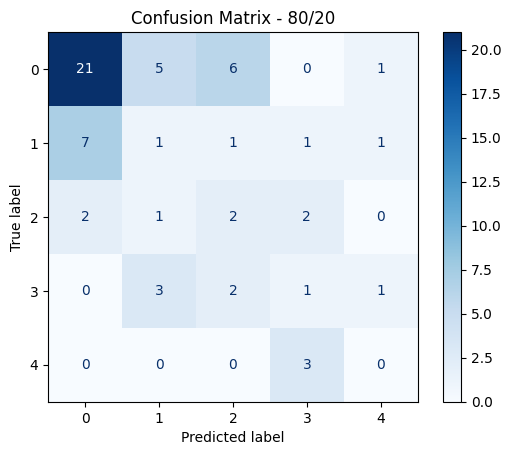

=== Đánh giá mô hình cho tỷ lệ 90/10 ===
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        17
           1       0.14      0.17      0.15         6
           2       0.25      0.25      0.25         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.45        31
   macro avg       0.22      0.22      0.22        31
weighted avg       0.45      0.45      0.45        31

Confusion Matrix:


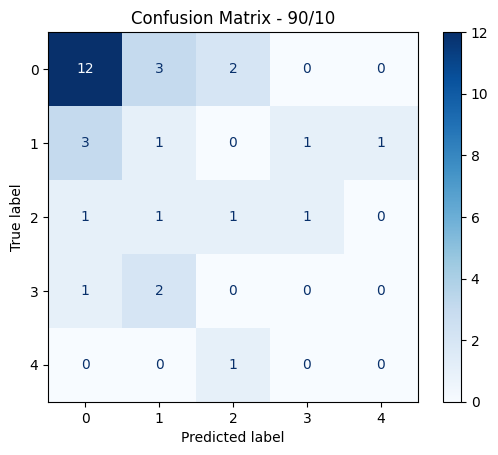

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

for key, data in split_data.items():
    clf = dt_models[key]
    X_test = data["feature_test"]
    y_test = data["label_test"]
    y_pred = clf.predict(X_test)
    
    print(f"=== Đánh giá mô hình cho tỷ lệ {key.replace('_', '/')} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {key.replace('_', '/')}")
    plt.show()

# 4. Ảnh hưởng của độ sâu cây quyết định đến độ chính xác (tập 80/20)
- Thử các giá trị max_depth: None, 2, 3, 4, 5, 6, 7
- Huấn luyện, vẽ cây, tính accuracy trên tập test
- Trình bày kết quả dạng bảng và biểu đồ

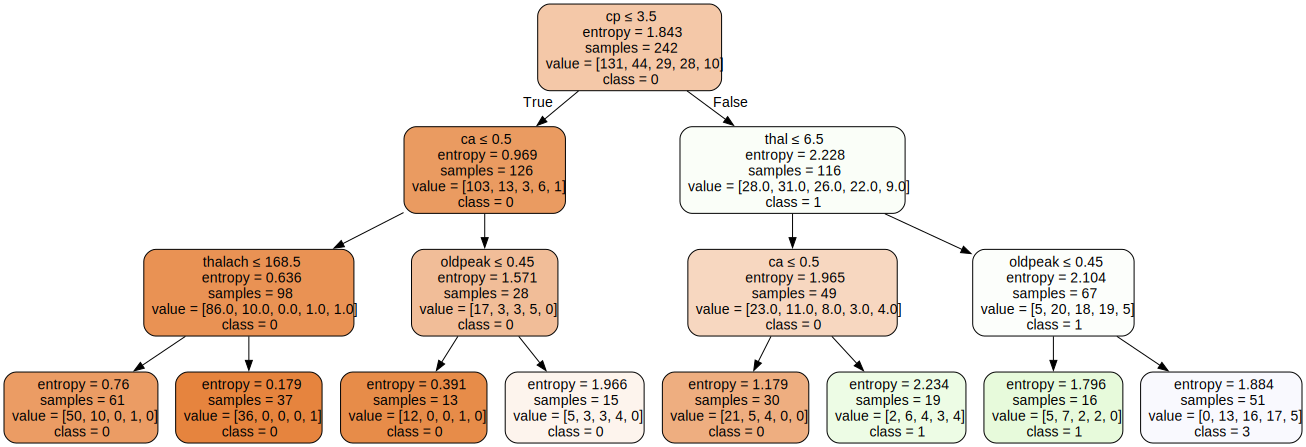

,max_depth,Accuracy
0,None,0.409836
1,2,0.524590
2,3,0.590164
3,4,0.475410
4,5,0.459016
5,6,0.442623
6,7,0.393443


In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_list = []
dot_data_depth = {}

X_train = split_data["80_20"]["feature_train"]
y_train = split_data["80_20"]["label_train"]
X_test = split_data["80_20"]["feature_test"]
y_test = split_data["80_20"]["label_test"]

for d in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    
    # Xuất cây ra DOT cho từng độ sâu
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=X_train.columns,
        class_names=[str(cls) for cls in np.unique(y_train)],
        filled=True, rounded=True, special_characters=True
    )
    dot_data_depth[d] = dot_data
    
    # Hiển thị cây cho từng độ sâu (ví dụ: chỉ hiển thị cho max_depth=3)
    if d == 3:
        graph = graphviz.Source(dot_data)
        display(graph)

# Tạo bảng kết quả
import pandas as pd
result_df = pd.DataFrame({
    "max_depth": ["None", 2, 3, 4, 5, 6, 7],
    "Accuracy": accuracy_list
})
display(result_df)

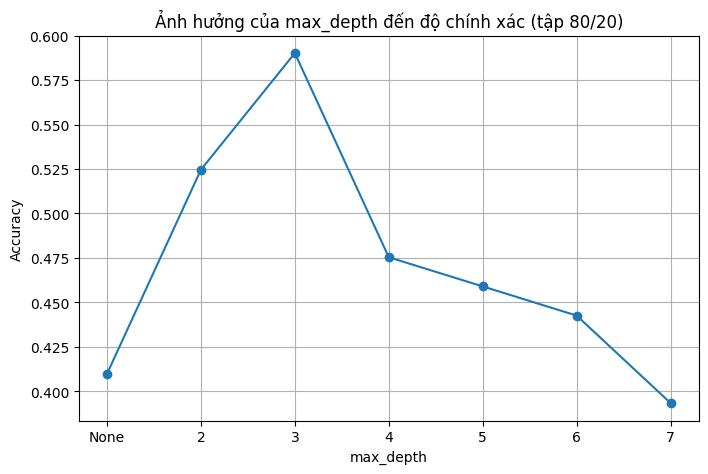

In [10]:
# Vẽ biểu đồ so sánh accuracy theo max_depth
plt.figure(figsize=(8,5))
plt.plot(["None", 2, 3, 4, 5, 6, 7], accuracy_list, marker='o')
plt.title("Ảnh hưởng của max_depth đến độ chính xác (tập 80/20)")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

**Nhận xét:**  
- Quan sát bảng và biểu đồ trên, bạn hãy phân tích ảnh hưởng của độ sâu cây quyết định đến độ chính xác trên tập test.
- Độ sâu quá nhỏ có thể gây underfitting, quá lớn có thể gây overfitting.